# Lesson 2: Maps and More Geographies

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Imports and Configuration

In [1]:
import censusdis.data as ced
from censusdis.datasets import ACS5
import censusdis.states as states

from matplotlib.ticker import FuncFormatter

In [2]:
MEDIAN_HOUSEHOLD_INCOME_VARIABLE = "B19013_001E"

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Query Geometry along with Data

Often, we'd like to plot our data on a map. So we need to know what each state looks like and where it is.
We can add `with_geometry=True` to our query to get what we need.

- The return value is now a `geopandas.GeoDataFrame`
- This is an extension of a `pandas.DataFrame` that adds `geometry` to each row.

In [3]:
gdf_all_states = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME", MEDIAN_HOUSEHOLD_INCOME_VARIABLE],
    state="*",
    # We want the geometry of the states too:
    with_geometry=True,
)

gdf_all_states.head()

,STATE,NAME,B19013_001E,geometry
0,42,Pennsylvania,63627,"POLYGON ((-80.51989 40.90666, -80.51963 40.911..."
1,06,California,78672,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
2,54,West Virginia,48037,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."
3,49,Utah,74197,"POLYGON ((-114.05296 37.59278, -114.05247 37.6..."
4,36,New York,71117,"MULTIPOLYGON (((-79.76215 42.24305, -79.76196 ..."


<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### Plot the Results on a Map

- `cem.plot_us` 
  - Conveniently projects the United States
  - Relocates AK, HI, and PR for a more compact display

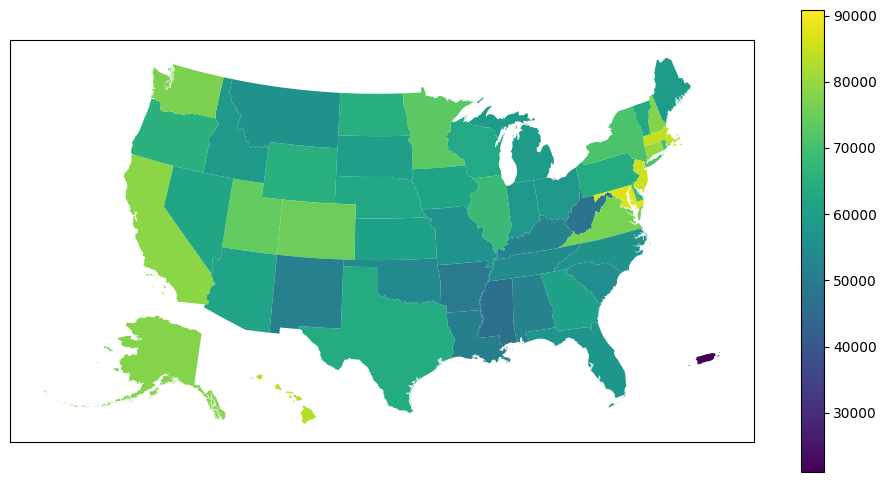

In [4]:
import censusdis.maps as cem

ax = cem.plot_us(
    gdf_all_states,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    # The **kwargs here are standard Matplotlib **kwargs
    legend=True,
    figsize=(12, 6),
)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### Styling the Map

- We can add a variety of styling to the map.
- Any args Matplotlib can take, we can pass through.

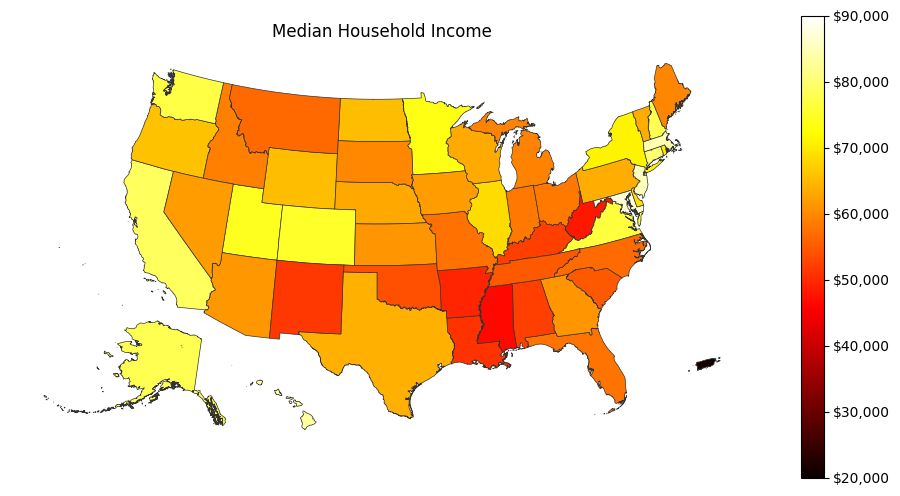

In [5]:
ax = cem.plot_us(
    gdf_all_states,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    # Styling with Matplotlib **kwargs
    cmap="hot",
    edgecolor="#333",
    linewidth=0.5,
    vmin=20_000,
    vmax=90_000,
    legend=True,
    figsize=(12, 6),
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"${x:,.0f}")},
)

ax.set_title("Median Household Income")
_ = ax.axis("off")

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## What other Geographies are Available?

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Counties

We choose the state but use the wildcard `county='*'`.

In [6]:
gdf_counties = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=[MEDIAN_HOUSEHOLD_INCOME_VARIABLE],
    # All the counties in Washington State.
    state=states.WA,
    county="*",
    with_geometry=True,
)

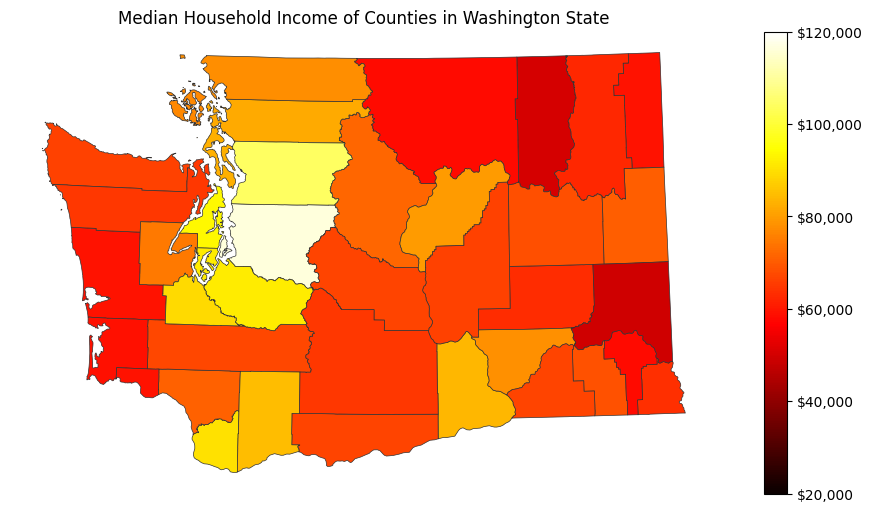

In [7]:
ax = cem.plot_map(
    # Counties
    gdf_counties,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    cmap="hot",
    edgecolor="#333",
    linewidth=0.5,
    vmin=20_000,
    vmax=120_000,
    legend=True,
    figsize=(12, 6),
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"${x:,.0f}")},
)

ax.set_title("Median Household Income of Counties in Washington State")
_ = ax.axis("off")

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### We are interested in Pierce County

In [8]:
from censusdis.counties.washington import PIERCE

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Census Tracts

- Tracts typically have 1-5,000 residents
- There are ~80,000 tracts in the U.S.

In [9]:
gdf_tracts = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=[MEDIAN_HOUSEHOLD_INCOME_VARIABLE],
    # All the census tracts in Pierce County
    state=states.WA,
    county=PIERCE,
    tract="*",
    with_geometry=True,
)

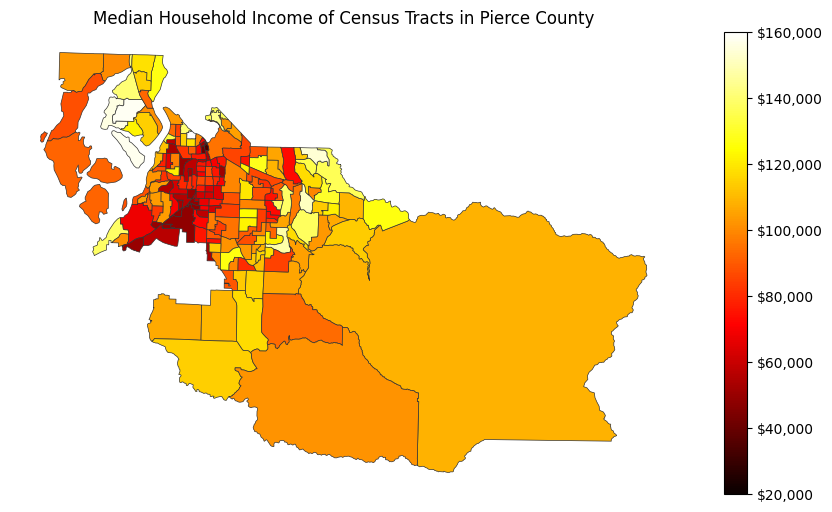

In [10]:
ax = cem.plot_map(
    # Tracts
    gdf_tracts,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    cmap="hot",
    edgecolor="#333",
    linewidth=0.5,
    vmin=20_000,
    vmax=160_000,
    legend=True,
    figsize=(12, 6),
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"${x:,.0f}")},
)

ax.set_title("Median Household Income of Census Tracts in Pierce County")
_ = ax.axis("off")

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Background Maps

- Add context and make maps more user friendly.

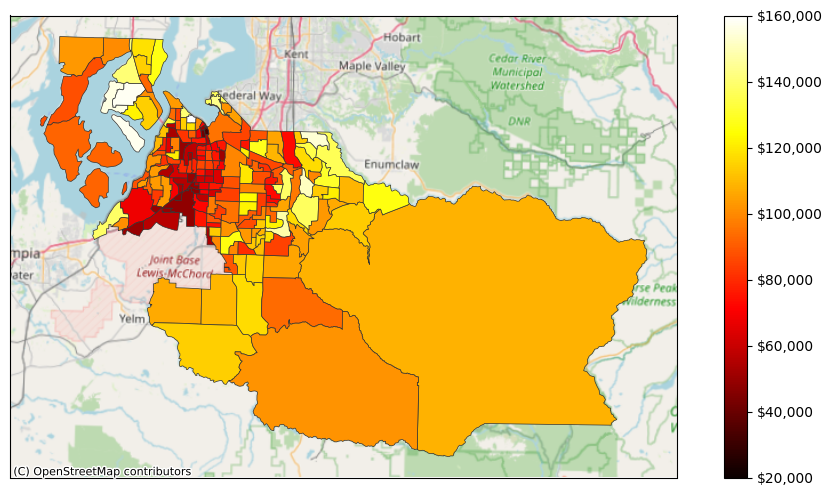

In [11]:
ax = cem.plot_map(
    # Tracts
    gdf_tracts,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    cmap="hot",
    edgecolor="#333",
    linewidth=0.5,
    vmin=20_000,
    vmax=160_000,
    legend=True,
    figsize=(12, 6),
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"${x:,.0f}")},
    # We can add a background to any map with
    # this optional argument.
    with_background=True,
)

<br/><br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Off-Spine Geography (And our first foray into metadata)

- *State - County - Tract - Block Group*, are referred to as *on-spine* geographies
- Not all geographies nest and cover all areas like on-spine geographies do.
- Those that don't are called *off-spine* geographies.
- We can query all available nested geometries, on and off-spine.
- All are valid combinations of geography kwargs.

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

![Census Geographies](../images/census_geos.png)

More details at https://www.census.gov/content/dam/Census/data/developers/geoareaconcepts.pdf.

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Query for geographies available for a dataset

Each element is a list that tells us a valid combination
of geography `kwargs`.

In [12]:
ced.geographies(ACS5, 2022)

[['us'],
 ['region'],
 ['division'],
 ['state'],
 ['state', 'county'],
 ['state', 'county', 'county_subdivision'],
 ['state', 'county', 'county_subdivision', 'subminor_civil_division'],
 ['state', 'county', 'county_subdivision', 'place_remainder_or_part'],
 ['state', 'county', 'tract'],
 ['state', 'county', 'tract', 'block_group'],
 ['state', 'place', 'county_or_part'],
 ['state', 'place'],
 ['state', 'consolidated_city'],
 ['state', 'consolidated_city', 'place_or_part'],
 ['state', 'alaska_native_regional_corporation'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_subdivision_remainder'],
 ['american_indian_area_alaska_native_area_reservation_or_statistical_entity_only'],
 ['american_indian_area_off_reservation_trust_land_only_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_census_tract'],
 ['american_indian_area_alaska_native_area_hawaiian_home

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Not all data sets support the same geographies

Let's look at `CBP` 
which tracks business activity at the county level and just a few other geographies.

In [13]:
from censusdis.datasets import CBP

In [14]:
ced.geographies(CBP, 2020)

[['us'],
 ['state'],
 ['state', 'county'],
 ['metropolitan_statistical_area_micropolitan_statistical_area'],
 ['combined_statistical_area'],
 ['state', 'congressional_district'],
 ['zip_code']]

Not every data set has the same geographies for every vintage.
For example, `ECN_BASIC`, which we will look at in a later lesson
only has national data for 2022.

In [15]:
from censusdis.datasets import ECN_BASIC

In [16]:
ced.geographies(ECN_BASIC, 2022)

[['us']]

In [17]:
ced.geographies(ECN_BASIC, 2017)

[['us'],
 ['region'],
 ['state'],
 ['state', 'county'],
 ['state', 'consolidated_city'],
 ['metropolitan_statistical_area_micropolitan_statistical_area'],
 ['metropolitan_statistical_area_micropolitan_statistical_area',
  'metropolitan_division'],
 ['combined_statistical_area'],
 ['state', 'place'],
 ['state', 'place', 'county_or_part']]

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Places in Washington State

- `['state', 'place']` was one of the entries in the list above. 
- It tells us that `state=` and `place=` are 
valid keywords to describe a geography.
- We will use them in the query below.
- Places are off-spine, so
  - Places do not cover the entire area of the state the way on-spine geometries do.
  - Every part of the state is in a county, a census tract, and a block group.
  - Not every part of the state is in a place.

In [18]:
gdf_wa_places = ced.download(
    ACS5,
    2022,
    ["NAME", MEDIAN_HOUSEHOLD_INCOME_VARIABLE],
    # Query all places in Washington State.
    state=states.WA,
    place="*",
    with_geometry=True,
)

gdf_wa_places.head()

,STATE,PLACE,NAME,B19013_001E,geometry
0,53,00100,"Aberdeen city, Washington",50008.0,"MULTIPOLYGON (((-123.69688 47.01895, -123.6966..."
1,53,00135,"Aberdeen Gardens CDP, Washington",NaN,"POLYGON ((-123.7956 47.05004, -123.78966 47.05..."
2,53,00275,"Acme CDP, Washington",NaN,"POLYGON ((-122.22005 48.72737, -122.21972 48.7..."
3,53,00380,"Addy CDP, Washington",NaN,"POLYGON ((-117.84418 48.36747, -117.83758 48.3..."
4,53,00800,"Ahtanum CDP, Washington",81354.0,"POLYGON ((-120.67102 46.5511, -120.66386 46.55..."


<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Plot places

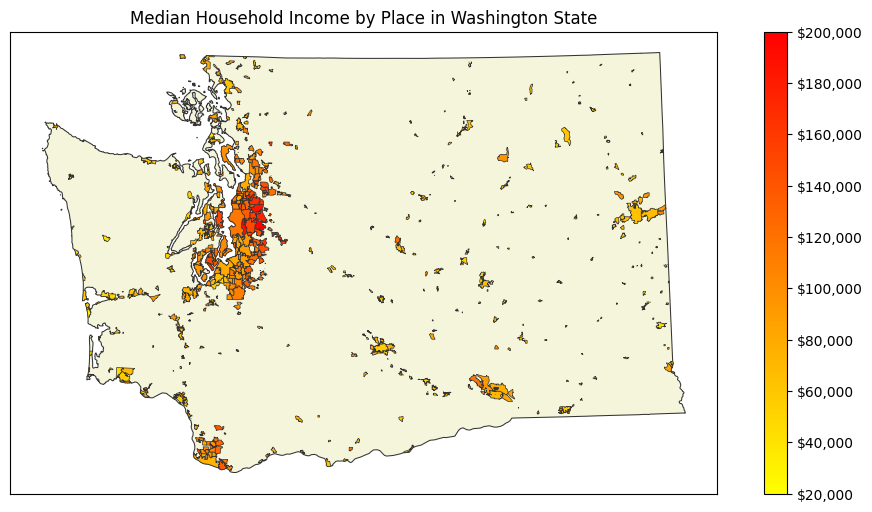

In [19]:
# Plot the whole state in a background color.
gdf_wa_state = ced.download(
    ACS5,
    2022,
    ["NAME"],
    state=states.WA,
    with_geometry=True,
)

ax = cem.plot_map(
    gdf_wa_state, linewidth=0.75, color="beige", edgecolor="#333", figsize=(12, 6)
)

# Plot the places on top.
ax = cem.plot_map(
    gdf_wa_places,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    cmap="autumn_r",
    edgecolor="#333",
    linewidth=0.5,
    vmin=20_000,
    vmax=200_000,
    figsize=(12, 6),
    legend=True,
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"${x:,.0f}")},
    ax=ax,
)

ax.set_title("Median Household Income by Place in Washington State")
None

#### Or if you prefer a background map

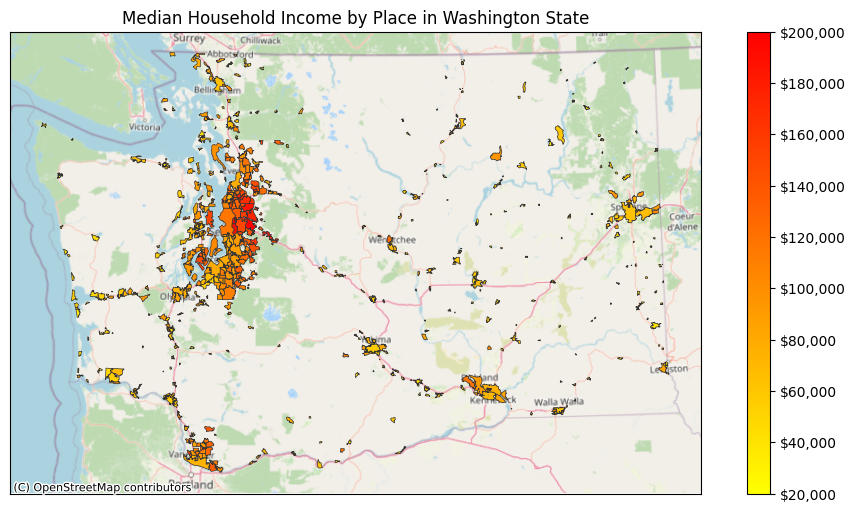

In [20]:
ax = cem.plot_map(
    gdf_wa_places,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    cmap="autumn_r",
    edgecolor="#333",
    linewidth=0.5,
    vmin=20_000,
    vmax=200_000,
    figsize=(12, 6),
    legend=True,
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"${x:,.0f}")},
    # Add a background map from
    # Open Street Maps
    with_background=True,
)

ax.set_title("Median Household Income by Place in Washington State")
None

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Query Core Based Statistical Areas (CBSAs) in the United States

- Metropolitan (population 50,000+) and Micropolitan (population 10,000-50,000) areas are collectively know as [Core Based Statistical Areas](https://en.wikipedia.org/wiki/Core-based_statistical_area) (CBSAs)
- Our list of geographies included `['metropolitan_statistical_area_micropolitan_statistical_area']`
- Note that this was standalone, not nested in a state like `place` was.
- CBSAs represent greater micro/metropolitan areas
- They may cross state lines

In [21]:
# Note: 'B03002_001E' is the variable for total population.
TOTAL_POPULATION_VARIABLE = "B03002_001E"

gdf_cbsa = ced.download(
    dataset=ACS5,
    # I am going back to 2021 because 2022
    # geographies for CBSAs are not available yet.
    vintage=2021,
    download_variables=[
        "NAME",
        MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
        TOTAL_POPULATION_VARIABLE,
    ],
    # Query all CBSAs in the country.
    metropolitan_statistical_area_micropolitan_statistical_area="*",
    with_geometry=True,
)

In [22]:
gdf_cbsa.head()

,METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA,NAME,B19013_001E,B03002_001E,geometry
0,10100,"Aberdeen, SD Micro Area",64194,42476,"POLYGON ((-99.70837 45.33235, -99.70845 45.339..."
1,10140,"Aberdeen, WA Micro Area",53615,74737,"MULTIPOLYGON (((-123.88454 46.96579, -123.8771..."
2,10180,"Abilene, TX Metro Area",57356,175241,"POLYGON ((-100.15184 32.09064, -100.14955 32.2..."
3,10220,"Ada, OK Micro Area",55862,38102,"POLYGON ((-96.93249 34.69496, -96.93249 34.767..."
4,10300,"Adrian, MI Micro Area",60656,99346,"POLYGON ((-84.3633 42.07346, -84.33584 42.0734..."


<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

In [23]:
# We want the n largest CBSAs by population.
n = 100
gdf_large_cbsa = gdf_cbsa.nlargest(n, TOTAL_POPULATION_VARIABLE)

In [24]:
gdf_large_cbsa.head()

,METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA,NAME,B19013_001E,B03002_001E,geometry
608,35620,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",86445,20011812,"MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ..."
499,31080,"Los Angeles-Long Beach-Anaheim, CA Metro Area",81652,13202558,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
163,16980,"Chicago-Naperville-Elgin, IL-IN-WI Metro Area",78790,9607711,"POLYGON ((-88.94215 42.06505, -88.93894 42.065..."
212,19100,"Dallas-Fort Worth-Arlington, TX Metro Area",76916,7543340,"POLYGON ((-98.0656 32.59502, -98.06486 32.6174..."
388,26420,"Houston-The Woodlands-Sugar Land, TX Metro Area",72551,7048954,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2..."


<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Plot the Largest CBSAs

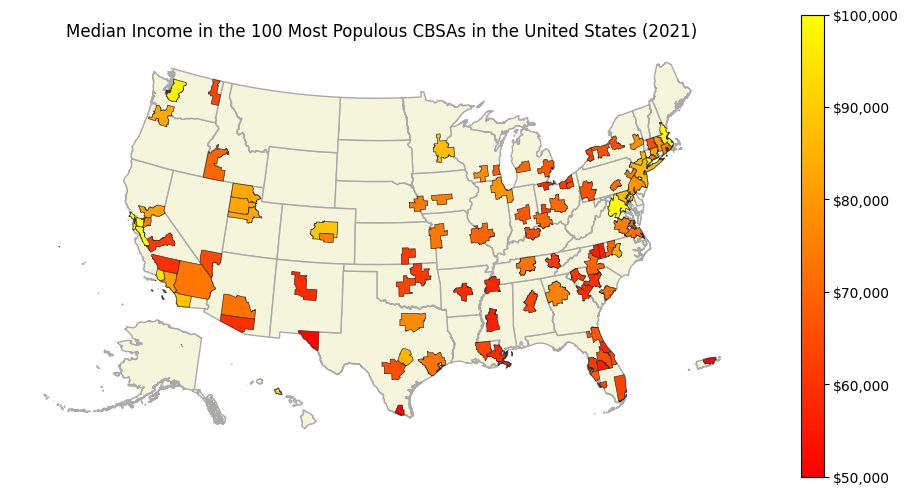

In [25]:
ax = cem.plot_us(gdf_all_states, color="beige", edgecolor="darkgrey", figsize=(12, 6))

ax = cem.plot_us(
    gdf_large_cbsa,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    cmap="autumn",
    edgecolor="#333",
    linewidth=0.5,
    vmin=50_000,
    vmax=100_000,
    legend=True,
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"${x:,.0f}")},
    ax=ax,
)

ax.axis("off")
_ = ax.set_title(
    f"Median Income in the {n} Most Populous CBSAs in the United States (2021)"
)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Exercise 2

Now it's time to get hands-on and apply what you have learned.
[Exercise 2](../Exercises/Exercise%202.ipynb) is a notebook
where you can make census queries similar to the ones we just 
made.

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Next Lesson

[Lesson 3: Variables](./Lesson%203%20Variables.ipynb)